# Índice
>[Actividad grupal: Ejercicios con puertas lógicas cuánticas](#scrollTo=IniU1uy5jDBm)

>>[Objetivos](#scrollTo=IniU1uy5jDBm)

>>[Pautas de elaboración](#scrollTo=IniU1uy5jDBm)

>>>[Ejercicio 1](#scrollTo=IniU1uy5jDBm)

>>>[Ejercicio 2](#scrollTo=IniU1uy5jDBm)

>>>[Ejercicio 3](#scrollTo=IniU1uy5jDBm)

>>[Desarrollo](#scrollTo=IniU1uy5jDBm)

>>>[Configuración del entorno](#scrollTo=w17mjP_AKnQU)

>>>[Importación de librerías](#scrollTo=HyET-FJGIDga)

>>>[Ejercicio 1](#scrollTo=oxDuLrqBkSuH)

>>>>[Estados de Bell](#scrollTo=0Jg4bOOBLmwy)

>>>>[Desarrollo matricial y en notación de Dirac](#scrollTo=GTqH0uCLUPsY)

>>>>>[1. Estado de Bell 1](#scrollTo=GTqH0uCLUPsY)

>>>>>[2. Estado de Bell 2](#scrollTo=GTqH0uCLUPsY)

>>>>>[3. Estado de Bell 3](#scrollTo=GTqH0uCLUPsY)

>>>>>[4. Estado de Bell 4](#scrollTo=GTqH0uCLUPsY)

>>>[Ejercicio 2](#scrollTo=M_8Bx7oLkbJL)

>>>[Ejercicio 3](#scrollTo=_ykHSYY_kceV)

>>>>[Funcones Auxiliares](#scrollTo=7QDLDuQOCPsx)

>>>>[Algoritmo de Teleportación Cuántica](#scrollTo=evpX0KEqA3sY)



# Actividad grupal: Ejercicios con puertas lógicas cuánticas

**Grupo:**

- Sabrina Álvarez Vásquez
- Héctor Casas Tarifa
- Eduardo Muñoz Orive
- Pablo Serrano Molinero


## Objetivos

A través de esta actividad, podrás adquirir las competencias necesarias para utilizar las puertas cuánticas básicas, así como comprender la evolución del estado cuántico, los estados de Bell y la implementación de un incrementador.

## Pautas de elaboración

### Ejercicio 1
Implementa cuatro circuitos cuánticos de manera que cada uno de ellos haga evolucionar el estado del sistema a cada uno de los cuatro estados de Bell. Describe la evolución del sistema paso a paso utilizando notación de Dirac y en forma matricial. Finalmente, implementa los circuitos utilizando QISKIt Quantum Lab y verifica que los resultados son los esperados.

### Ejercicio 2
Implementa circuitos con cuatro cúbits que sumen al registro cuántico los valores $1, 2, 3, 4, 5, 6, 7$ y $8$. Verifica que los circuitos funcionen correctamente utilizando QISKit Quantum Lab.

### Ejercicio 3
Implementa en Python el algoritmo de teleportación cuántica para transferir el estado |$\psi$⟩ del cúbit de Alice al cúbit de Bob. El estado |$\psi$⟩ viene determinado por los ángulos $\theta=37.5$ grados y $\phi=13.4$ grados en la esfera de Bloch.

## Desarrollo




### Configuración del entorno
Instalación de librerías necesarias si no estuvieran instaladas

In [ ]:
try:
    import qiskit
    import pylatexenc
    print("qiskit y pylatexenc ya están instalados.")
except ImportError:
    print("qiskit y pylatexenc no están instalados. Instalando...")
    !pip install qiskit qiskit-aer pylatexenc


qiskit y pylatexenc no están instalados. Instalando...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=63ff45867349a39a2f471eebad238160be45741eaea833ed48395317b09b4a68
  Stored in directo

### Importación de librerías
Para el desarrollo de esta práctica importaremos las siguientes librerías.

In [ ]:
# Herramientas matemáticas
import numpy as np
from math import pi

# Implmentaciones cuánticas
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import C3XGate
from qiskit.providers.aer import AerSimulator

# Visualización
import matplotlib.pyplot as plt

### Ejercicio 1
Implementa cuatro circuitos cuánticos de manera que cada uno de ellos haga evolucionar el estado del sistema a cada uno de los cuatro estados de Bell. Describe la evolución del sistema paso a paso utilizando notación de Dirac y en forma matricial. Finalmente, implementa los circuitos utilizando QISKIt Quantum Lab y verifica que los resultados son los esperados.

#### Estados de Bell

Los estados de Bell son cuatro estados cuánticos que forman una base ortonormal del espacio de Hilbert de dos qubits. Estos estados son importantes porque son estados maximamente entrelazados. Los estados de Bell son:

* $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ -> B1
* $|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$ -> B2
* $|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ -> B3
* $|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$ -> B4

Implementaremos una función que nos permita obtener estos estados. Esta funcíon creará un circuito haciendo uso de las ya conocidadas puertas $X$ y $H$, pero también hará uso de la puerta $CNOT$ y la puerta $Z$.

$CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                        0 & 1 & 0 & 0 \\
                       0 & 0 & 0 & 1 \\
                      0 & 0 & 1 & 0 \end{bmatrix}$

Esta puerta es una puerta $X$ controlada, es decir, que si el qubit de control está en estado $|1\rangle$ se aplica la puerta $X$ al qubit objetivo, si el qubit de control está en estado $|0\rangle$ no se aplica la puerta $X$ al qubit objetivo.

$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$

Esta puerta nos permite realizar una rotación de $180º$ alrededor del eje $Z$ en el plano de la esfera de Bloch. Esta puerta también se conoce como phase flip ya que cambia la fase del estado $|1\rangle$.

La función que desarrollaremos hará lo siguiente:

* Para el primer estado de Bell el circuito estaría formado por una puerta $H$ en el primer qubit y una puerta $CNOT$ con el primer qubit como control y el segundo qubit como objetivo. Esto genera un estado en superposición $|+\rangle$ y luego aplica la puerta $X$ al segundo qubit si el primer qubit está en estado $|1\rangle$, generando así el estado $|\Phi^+\rangle$.

* Para el segundo estado de Bell el circuito estaría formado por una puerta $X$ y una $H$ en el primer qubit y una puerta $CNOT$ con el primer qubit como control y el segundo qubit como objetivo. Esto genera un estado en superposición $|-\rangle$ primero y luego aplica la puerta $X$ al segundo qubit si el primer qubit está en estado $|1\rangle$, generando así el estado $|\Phi^-\rangle$.

* Para el tercer estado de Bell el circuito estaría formado por una puerta $H$ en el primer qubit, una puerta $X$ en el segundo qubit y una puerta $CNOT$ con el primer qubit como control y el segundo qubit como objetivo. Esto genera un estado en superposición $|+\rangle$ primero, luego aplica la puerta $X$ al segundo qubit y por último la $CNOT$ aplica $X$ si el primer qubit está en estado $|1\rangle$, generando así el estado $|\Psi^+\rangle$.

* Para el cuarto estado de Bell el circuito estaría formado por una puerta $H$ y una $X$ en el primer qubit, una puerta $X$ y una $Z$ en el segundo qubit y una puerta $CNOT$ con el primer qubit como control y el segundo qubit como objetivo. Esto genera un estado en superposición $|-\rangle$ primero, luego aplica la puerta $X$ y la $Z$ al segundo qubit y por último la $CNOT$ aplica $X$ si el primer qubit está en estado $|1\rangle$, generando así el estado $|\Psi^-\rangle$.

In [ ]:
# Crearemos una función que nos devuelva el circuito correspondiente al estado de bell elegido

def bell(estado):
    """
    Devuelve el estado de Bell elegido

    Args:
        estado (char): estado de Bell elegido

    Returns:
        statevector: estado de Bell elegido
    """
    # Creamos un circuito cuántico con 2 qubits
    circuito = QuantumCircuit(2)

    if estado == "B1":
        circuito.h(0)
        circuito.cx(0,1)

    elif estado == "B2":
        circuito.x(0)
        circuito.h(0)
        circuito.cx(0,1)

    elif estado == "B3":
        circuito.x(1)
        circuito.h(0)
        circuito.cx(0,1)

    elif estado == "B4":
        circuito.x(1)
        circuito.x(0)
        circuito.h(0)
        circuito.z(1)
        circuito.cx(0,1)

    else:
        print("No existe ese estado de Bell")
        return None

    # Devolvemos el estado de Bell elegido
    return circuito

Una vez definida la función que nos creará los circuitos generadores de los estados de Bell, vamos a obtenerlos.

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


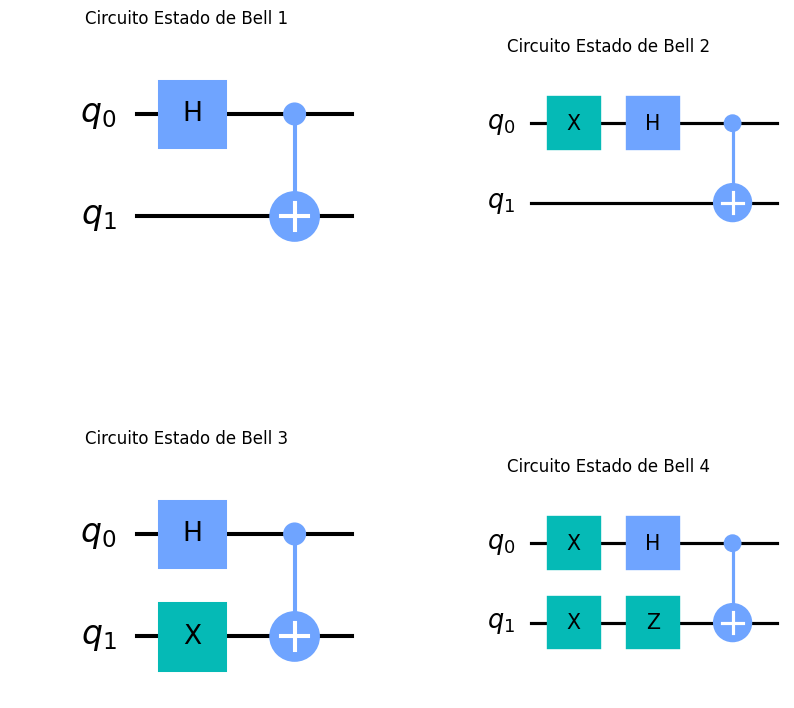

In [ ]:
# Dibuja los circuitos en una cuadrícula
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Dibuja el primer circuito
circuit_drawer(bell("B1"), output='mpl', ax=axs[0, 0])
axs[0, 0].set_title('Circuito Estado de Bell 1')

# Dibuja el segundo circuito
circuit_drawer(bell("B2"), output='mpl', ax=axs[0, 1])
axs[0, 1].set_title('Circuito Estado de Bell 2')

# Dibuja el tercer circuito
circuit_drawer(bell("B3"), output='mpl', ax=axs[1, 0])
axs[1, 0].set_title('Circuito Estado de Bell 3')

# Dibuja el cuarto circuito
circuit_drawer(bell("B4"), output='mpl', ax=axs[1, 1])
axs[1, 1].set_title('Circuito Estado de Bell 4')

plt.show()

Representamos ahora los diferentes estados de Bell

In [ ]:
# Evaluamos el circuito
ket_b1 = execute(bell("B1"), backend=Aer.get_backend("statevector_simulator")).result().get_statevector()
ket_b2 = execute(bell("B2"), backend=Aer.get_backend("statevector_simulator")).result().get_statevector()
ket_b3 = execute(bell("B3"), backend=Aer.get_backend("statevector_simulator")).result().get_statevector()
ket_b4 = execute(bell("B4"), backend=Aer.get_backend("statevector_simulator")).result().get_statevector()

# Representamos el estado
# EStado
print("Estado: ")
ket_b1.draw('latex')


Estado: 


<IPython.core.display.Latex object>

In [ ]:
# Representamos el estado
# EStado
print("Estado: ")
ket_b2.draw('latex')

Estado: 


<IPython.core.display.Latex object>

In [ ]:
# Representamos el estado
# EStado
print("Estado: ")
ket_b3.draw('latex')

Estado: 


<IPython.core.display.Latex object>

In [ ]:
# Representamos el estado
# EStado
print("Estado: ")
ket_b4.draw('latex')

Estado: 


<IPython.core.display.Latex object>

#### **Desarrollo matricial y en notación de Dirac**
A continuación, describiremos la evolución de los circuitos utilizados para obtener los distintos estados de Bell utilizando tanto la notación de Dirac como la notación matricial.
##### **1. Estado de Bell 1**
Comenzamos describiendo el proceso en notación de Dirac. En este caso, el circuito consta de una puerta Hadamard actuando sobre el qubit 0 y una puerta CNOT cuyo qubit objetivo es el qubit 1 y cuyo qubit de control es el 0.

Recordemos que para calcular la matriz unitaria total de un circuito cuántico debemos realizar el producto matricial cuando tengamos puertas cuánticas en serie y el producto tensorial cuando tengamos puertas cuánticas en paralelo.
En nuestro caso, debemos realizar el producto tensorial de una matriz unitaria (ya que sobre el qubit 1 no está actuando ninguna puerta en paralelo con la puerta hadamard) y una puerta hadamard. El resultado será una puerta actuando en serie con la puerta CNOT por lo que deberemos realizar el producto matricial para calcular la matriz total:

$U=CX \cdot (I \otimes H)$

Así pues, el estado resultante será el siguiente:

$ | \psi \rangle =U |0 \rangle=| \Phi^+ \rangle $

Veamos el desarrollo matricial:

$U=CX \cdot (I \otimes H)=\begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix} \cdot \left( \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \otimes \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \end{pmatrix} \right) = $

$= \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix} \cdot \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0\\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0\\ 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ 0 & 0 & \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \end{pmatrix} = \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0\\ 0 & 0 & \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2}\\ 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0 \end{pmatrix}$

De este modo, el estado resultante será:

$ \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0\\ 0 & 0 & \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2}\\ 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \\0 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{\sqrt{2}}{2} \\ 0 \\0 \\ \frac{\sqrt{2}}{2} \end{pmatrix}$

##### **2. Estado de Bell 2**
En notación de Dirac:

$U=CX \cdot (I \otimes H) \cdot (I \otimes X) \Rightarrow | \psi \rangle = U |0 \rangle = | \Phi^- \rangle $

En notación matricial

$U=CX \cdot (I \otimes H) \cdot (I \otimes X) = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix} \cdot \left( \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \otimes \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \end{pmatrix} \right) \cdot \left( \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \otimes \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \right) = $

$= \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix} \cdot \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0\\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0\\ 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ 0 & 0 & \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \end{pmatrix} \cdot \begin{pmatrix} 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} = \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0\\ 0 & 0 & -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0 \end{pmatrix} \Rightarrow $

$ ⇒ \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0\\ 0 & 0 & -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{\sqrt{2}}{2} \\ 0 \\0 \\ -\frac{\sqrt{2}}{2} \end{pmatrix}$

##### **3. Estado de Bell 3**

En notación de Dirac:

$U= CX \cdot ( X \otimes  H) \Rightarrow | \psi \rangle = U |0 \rangle = | \Psi^+ \rangle $

En notación matricial:

$U= CX \cdot ( X \otimes  H) = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix} \cdot \left( \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \otimes \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \end{pmatrix} \right) = $

$ = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ 0 & 0 & \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0 \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0 \\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0 \\ 0 & 0 & \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \end{pmatrix} \Rightarrow$

$\Rightarrow \begin{pmatrix} 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0 \\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0 \\ 0 & 0 & \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \\ 0 \end{pmatrix}$

#####**4. Estado de Bell 4**

En notación de Dirac:

$ U= CX \cdot (Z \otimes H) \cdot ( X \otimes X) \Rightarrow | \psi \rangle = U | 0 \rangle = | \Psi^- \rangle$

En notación matricial:

$ U= CX \cdot (Z \otimes H) \cdot ( X \otimes X) = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix} \cdot \left( \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \otimes \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \end{pmatrix} \right) \left( \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \otimes \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \right) =$

$= \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix} \cdot \begin{pmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & 0\\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0\\ 0 & 0 & -\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2}\\ 0 & 0 & -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0 \\ -\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0 \\ 0 & 0 & -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \end{pmatrix} \Rightarrow $

$\Rightarrow \begin{pmatrix} 0 & 0 & \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0 \\ -\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 & 0 \\ 0 & 0 & -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ \frac{\sqrt{2}}{2} \\ -\frac{\sqrt{2}}{2} \\ 0 \end{pmatrix}$

### Ejercicio 2
Implementa circuitos con cuatro cúbits que sumen al registro cuántico los valores $1, 2, 3, 4, 5, 6, 7$ y $8$. Verifica que los circuitos funcionen correctamente utilizando QISKit Quantum Lab.

Comencemos con el caso más sencillo. Para ello definamos una función que sume 1 en binario.

In [ ]:
# Creamos una función que nos devuelva un circuito para sumar 1 en binario
def suma_1():

    # Creamos el circuito cuántico de 4 qubits
    qreg_q = QuantumRegister(4, 'q')

    qc = QuantumCircuit(qreg_q)

    # Agregamos las puertas necesarias para que sume en binario 0001
    qc.append(C3XGate(), [0,1,2,3])
    qc.ccx(0, 1, 2)
    qc.cx(0, 1)
    qc.x(0)

    qc.barrier()

    return qc

Para realizar las pruebas, definiremos una función que nos devuelva un circuito con el estado iniciado en un número del 0 al 8.

In [ ]:
# Definimos la función para el estado inicial
def estado_inicial(numero):

    # Transformamos el número de entrada en binario
    binario = format(numero, '04b')

    # Creamos el circuito de 4 qubits
    circuit = QuantumCircuit(4)

    # Por cada '1' de la cadena de 0 y 1 del número en base binaria, agregamos una pueta X (notemos que el orden es el inverso)
    for index, bit in enumerate(reversed(binario)):
        if bit == '1':
            circuit.x(index)

    circuit.barrier()

    return circuit

Veamos como son estos dos circuitos.

In [ ]:
estado_inicial(3).compose(suma_1()).draw()

┌───┐ ░                ┌───┐ ░ 
q_0: ┤ X ├─░───■────■────■──┤ X ├─░─
     ├───┤ ░   │    │  ┌─┴─┐└───┘ ░ 
q_1: ┤ X ├─░───■────■──┤ X ├──────░─
     └───┘ ░   │  ┌─┴─┐└───┘      ░ 
q_2: ──────░───■──┤ X ├───────────░─
           ░ ┌─┴─┐└───┘           ░ 
q_3: ──────░─┤ X ├────────────────░─
           ░ └───┘                ░

Podemos generalizar la suma, concatenando este circutio.

In [ ]:
# Definimos una nueva función que admita el número de entrada que queremos sumar
def suma_n(numero):

    # Generamos el circuito
    circuit = QuantumCircuit(4)

    # Sumamos n veces 1
    for _ in range(numero):
        circuit = circuit.compose(suma_1())

    return circuit

Por último, definimos otra función más para realizar la simulación. Esta función nos devolverá el valor con mayor probabilidad.

In [ ]:
# Definimos la función suma.
def suma_q(num_1, num_2):

    # Usamos el primer número para el estado inicial, y el segundo para el número de veces que sumamos 1
    qc = estado_inicial(num_1).compose(suma_n(num_2))

    # Medimos
    qc.measure_all()

    sim = AerSimulator()

    # Ejecutamos el circuito que hemos creado
    job = execute(qc, sim, shots = 1024)
    result = job.result()
    counts = result.get_counts()

    # Obtenemos el valor que más veces ha salido
    max_state = max(counts, key=counts.get)

    # Lo transformamos a base decimal
    decimal_value = int(max_state, 2)

    return decimal_value

Probemosla. Para ello, sumaremos al número 3 todos los números del 1 al 8.

In [ ]:
suma_q(2,3)

5

In [ ]:
print(suma_q(3,1))
print(suma_q(3,2))
print(suma_q(3,3))
print(suma_q(3,4))
print(suma_q(3,5))
print(suma_q(3,6))
print(suma_q(3,7))
print(suma_q(3,8))

4
5
6
7
8
9
10
11


Los resultados obtenidos son correctos. Por último, probaremos algunos casos más cambiando el primer número.

In [ ]:
print(suma_q(2,5))
print(suma_q(4,2))
print(suma_q(6,1))
print(suma_q(8,7))

7
6
7
15


Para reducir el número de puertas usadas, podemos realizar un circuito distinto por cada número que queremos sumar.

In [ ]:
def suma_2():

    # Creamos el circuito cuántico de 4 qubits
    qreg_q = QuantumRegister(4, 'q')

    qc = QuantumCircuit(qreg_q)

    # Agregamos las puertas necesarias para que sume en binario 0010
    qc.ccx(1, 2, 3)
    qc.cx(1, 2)
    qc.x(1)

    qc.barrier()

    return qc

def suma_3():

    # Creamos el circuito cuántico de 4 qubits
    qreg_q = QuantumRegister(4, 'q')

    qc = QuantumCircuit(qreg_q)

    # Agregamos las puertas necesarias para que sume en binario 0011
    qc.x(0)
    qc.x(1)
    qc.cx(2, 3)

    qc.append(C3XGate(), [0,1,2,3])
    qc.ccx(0, 1, 2)
    qc.x(1)
    qc.cx(0, 1)
    qc.x(2)

    qc.barrier()

    return qc

def suma_4():

    # Creamos el circuito cuántico de 4 qubits
    qreg_q = QuantumRegister(4, 'q')

    qc = QuantumCircuit(qreg_q)

    # Agregamos las puertas necesarias para que sume en binario 0100
    qc.cx(2, 3)
    qc.x(2)

    qc.barrier()

    return qc

def suma_5():

    # Creamos el circuito cuántico de 4 qubits
    qreg_q = QuantumRegister(4, 'q')

    qc = QuantumCircuit(qreg_q)

    # Agregamos las puertas necesarias para que sume en binario 0101
    qc.append(C3XGate(), [0,1,2,3])
    qc.ccx(0, 1, 3)
    qc.cx(2, 3)

    qc.cx(0, 1)
    qc.ccx(0, 1, 2)

    qc.x(0)
    qc.x(1)

    qc.ccx(0, 1, 2)

    qc.x(1)

    qc.ccx(0, 1, 2)

    qc.barrier()

    return qc

def suma_6():

    # Creamos el circuito cuántico de 4 qubits
    qreg_q = QuantumRegister(4, 'q')

    qc = QuantumCircuit(qreg_q)

    # Agregamos las puertas necesarias para que sume en binario 0110
    qc.x(1)

    qc.cx(1, 2)

    qc.ccx(1, 2, 3)

    qc.x(3)

    qc.barrier()

    return qc

def suma_7():

    # Creamos el circuito cuántico de 4 qubits
    qreg_q = QuantumRegister(4, 'q')

    qc = QuantumCircuit(qreg_q)

    # Agregamos las puertas necesarias para que sume en binario 0111
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)

    qc.append(C3XGate(), [0,1,2,3])
    qc.x(2)

    qc.ccx(0, 1, 2)
    qc.x(1)

    qc.cx(0, 1)

    qc.barrier()

    return qc

def suma_8():

    # Creamos el circuito cuántico de 4 qubits
    qreg_q = QuantumRegister(4, 'q')

    qc = QuantumCircuit(qreg_q)

    # Agregamos las puertas necesarias para que sume en binario 1000
    qc.x(3)

    qc.barrier()

    return qc

Generamos de nuevo otra función para probar de forma más fácil.

In [ ]:
def suma_q_2(num_1, num_2):

    # Juntamos todos nuestros circuitos únicos
    sumas = [suma_1(), suma_2(), suma_3(), suma_4(), suma_5(), suma_6(), suma_7(), suma_8()]

    qc = estado_inicial(num_1).compose(sumas[num_2-1])

    qc.measure_all()

    sim = AerSimulator()

    # Ejecutamos el circuito que hemos creado
    job = execute(qc, sim, shots = 1024)
    result = job.result()
    counts = result.get_counts()

    max_state = max(counts, key=counts.get)

    decimal_value = int(max_state, 2)

    return decimal_value

In [ ]:
suma_q_2(2,6)

8

Notemos de este ejercicio que, podemos realizarlo de forma más sencilla haciendo uso de un mayor número de puertas. Sería interesante, encontrar un teorema que nos límite el número máximo de puertas necesarias para cada operación, pero es algo que escapa del alcance de esta actividad.

### Ejercicio 3
Implementa en Python el algoritmo de teleportación cuántica para transferir el estado |$\psi$⟩ del cúbit de Alice al cúbit de Bob. El estado |$\psi$⟩ viene determinado por los ángulos $\theta=37.5$ grados y $\phi=13.4$ grados en la esfera de Bloch.


#### Funcones Auxiliares
El primer paso en este ejercicio será crear una función que genere el estado requerido en base a sus ángulos de Euler $\theta$ y $\phi$.

Esta función tomará como argumentos dichos ángulos y devolverá el estado cuántico correspondiente.

In [ ]:
def estado_euler(theta, phi, decimals=None):
    """
    Esta función genera un estado cuántico en base a dos ángulos de Euler.

    Parameters
    ----------
    theta : float
        Ángulo theta en grados.
    phi : float
        Ángulo phi en grados.
    decimals : int, optional
        Número de decimales a mostrar en la representación del estado cuántico.

    Returns
    -------
    estado : numpy.ndarray
        Vector de estado cuántico resultante.

    Notes
    -----
    La función toma dos ángulos de Euler, theta y phi, y genera un estado cuántico
     aplicando rotaciones RY y RZ en un circuito cuántico.

    El circuito cuántico consta de un registro cuántico con un qubit, donde se aplica
    una rotación RY con ángulo theta_rad seguida de una rotación RZ con ángulo phi_rad.

    El estado cuántico resultante se obtiene ejecutando el circuito en un simulador
    statevector_simulator de Qiskit con 1024 shots.

    """
    # Convertimos los ángulos a radianes
    theta = theta * pi / 180
    phi = phi * pi / 180

    # Creamos el estado en base a un circuito cuántico
    q = QuantumRegister(1)
    circuito = QuantumCircuit(q)
    circuito.ry(theta, q[0])
    circuito.rz(phi, q[0])

    # Ejecutamos el circuito
    simulador = Aer.get_backend('statevector_simulator')

    # Recuperamos el estado
    estado = execute(circuito, backend=simulador, shots=1024).result().get_statevector(decimals=decimals)

    return estado


Una vez implementada esta función la utilizaremos en nuestro algoritmo de teleportación cuántica.


#### Algoritmo de Teleportación Cuántica
Desarrollaremos una función que tomará como entrada un estado cuántico y el número de evaluaciones que queremos realizar del algoritmo y ejecutará el algoritmo de teleportación cuántica $N$ veces.

El algoritmo de teleportación cuántica se compone de los siguientes pasos:

1. Preparación del par de Bell $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ que comparten Alice y Bob.
2. Alice prepara el estado a teleportar |$\psi$⟩.
3. Alice aplica una compuerta CNOT sobre los qubits que tiene en su poder donde el qubit de control es el que contiene el estado a teleportar.
4. Alice aplica una compuerta Hadamard sobre el qubit que contiene el estado a teleportar.
5. Alice mide el estado de sus dos qubits, el que comparte entrelazamiento con el de Bob y el que quiere enviar.
6. En función de las medidas de Alice Bob aplicará condicionalmente las puertas $X$ y $Z$ sobre su estado. El estado resultante será el estado |$\psi$⟩ que envió Alice.

In [ ]:
# Esta implementación será una función que recibe como parámetro el estado a teleportar
def teleportacion_cuantica(estado, shots=1024):
    """
    Esta función implementa el algoritmo de teleportación cuántica.

    Parameters
    ----------
    estado : numpy.ndarray
        Estado cuántico a teleportar.
    shots : int, optional
        Número de evaluaciones del circuito.

    Returns
    -------
    circuito : QuantumCircuit
        Circuito cuántico implementado.
    conteos : dict
        Conteos tras la ejecución del circuito.
    Bob : dict
        Conteos del estado recibido por Bob.

    Notes
    -----
    La función implementa el algoritmo de teleportación cuántica utilizando tres
    registros cuánticos y tres registros clásicos.

    El circuito consta de las siguientes etapas:
    1. Creación de un par EPR (Entangled Pair of Qubits) entre Alice y Bob.
    2. Preparación del estado cuántico a teleportar en Alice.
    3. Aplicación de puertas cuánticas (CNOT, Hadamard) y medidas en Alice.
    4. Aplicación de puertas X y Z en Bob condicionalmente según las medidas de Alice.
    5. Medida del qubit de Bob.

    Los resultados se normalizan y se proporcionan tanto los conteos globales como
    los conteos específicos del estado recibido por Bob.

    """
    # Creamos los registros cuánticos y clásicos necesarios
    alice = QuantumRegister(2, name='alice')
    bob = QuantumRegister(1, name='bob')

    c0 = ClassicalRegister(1, name='c0')
    c1 = ClassicalRegister(1, name='c1')
    c2 = ClassicalRegister(1, name='c2')


    # Creamos el circuito cuántico
    circuito = QuantumCircuit(alice, bob, c0, c1, c2)

    # Creamos el par EPR
    circuito.h(alice[1])
    circuito.cx(alice[1], bob[0])
    circuito.barrier()

    # Preparamos el estado a teleportar
    circuito.initialize(estado, alice[0])
    circuito.barrier()

    # Aplicamos la puerta CNOT
    circuito.cx(0, 1)

    # Aplicamos la puerta Hadamard
    circuito.h(0)
    circuito.barrier()

    # Medimos los qubit de Alice
    circuito.measure(alice[0], c2)
    circuito.measure(alice[1], c0)

    # Aplicamos las puertas X y Z si es necesario
    circuito.x(bob[0]).c_if(c0, 1)

    circuito.z(bob[0]).c_if(c2, 1)


    # Medimos el qubit de Bob
    circuito.measure(bob[0], 0)

    # Ejecutamos el circuito
    simulador = Aer.get_backend('statevector_simulator')

    conteos = execute(circuito, backend=simulador, shots=shots).result().get_counts()

        # Normalizamos los resultados
    for k in conteos:
        conteos[k] = conteos[k]/shots

    # Agregamos los conteos para obtener únicamente la salida de Bob
        Bob = {}
    for key, value in conteos.items():
      ultimo_numero = key.split()[-1]  # Obtener el último número de la clave
      if ultimo_numero in Bob:
        Bob[ultimo_numero] += value
      else:
        Bob[ultimo_numero] = value

    return circuito, conteos, Bob

Representamos el estado que vamos a teleportar

In [ ]:
# Creamos el estado cuántico a teleportar
theta = 37.5
phi = 13.4

estado = estado_euler(theta, phi)
prob_0 = np.round(np.abs(estado[0])**2,3)
prob_1 = np.round(np.abs(estado[1])**2,3)

# Representamos el estado cuántico
estado.draw(output='latex')


<IPython.core.display.Latex object>

Representamos también las probabilidades teóricas del estado que enviaremos. Estas probabilidades las compararemos con los resultados que obtiene Bob al evaluar su estado tras el algoritmo de teleportación.

In [ ]:
print("Probabilidad 0: ", prob_0)
print("Probabilidad 1: ", prob_1)

Probabilidad 0:  0.897
Probabilidad 1:  0.103


Ejecutamos el algoritmo de teleportación cuántica y representamos los resultados obtenidos.

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


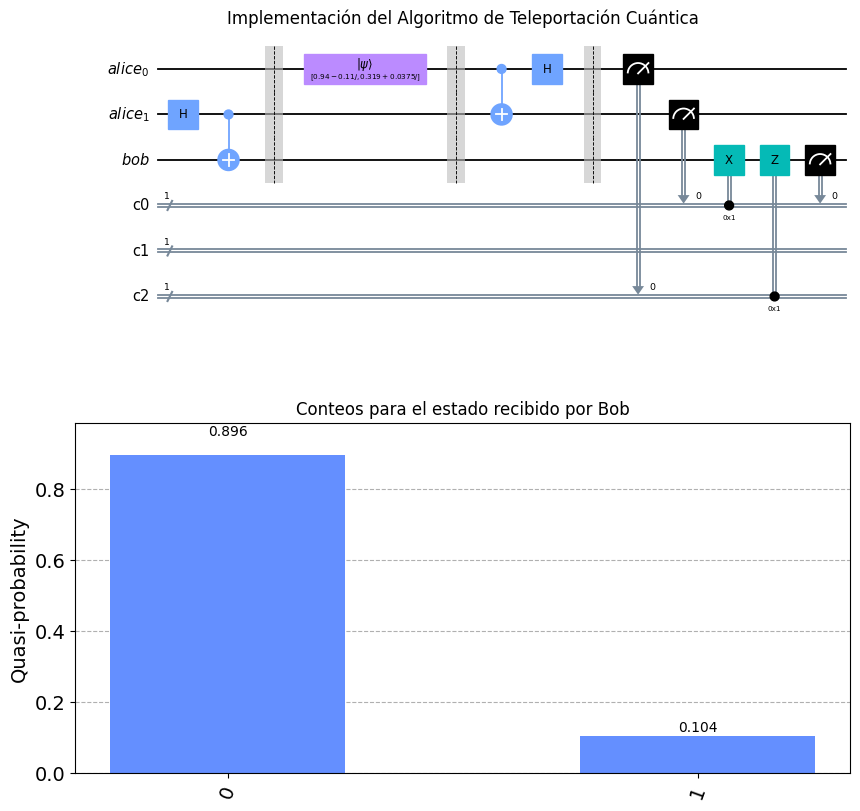

In [ ]:
# Ejecutamos el algoritmo de teleportación cuántica
circuito, conteos, Bob = teleportacion_cuantica(estado, shots=4096)

# Creamos una figura para mostrar el circuito y los conteos
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('Implementación del Algoritmo de Teleportación Cuántica')

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title('Conteos para el estado recibido por Bob')

circuito.draw(output='mpl',ax=ax1)
plot_histogram(Bob, ax=ax2)

Podemo observar que las medidas de Bob sobre su estado tras la implementación del algoritmo de teleportación cuántica es el mismo que el que queríamos enviar.